# Lecture 16, solutions of the steady-state EBM with a = a(T)

This lecture accompanies our study of the simplest EBM but with a nonlinear albedo

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def plotme(Q): 
    sig = 5.67e-8
    gamma = 0.62
    a = lambda T: 0.5 - 0.2*np.tanh(0.1*(T - 265))
    ap = lambda T: -0.2*0.1/np.cosh(0.1*(T - 265))**2
    f = lambda T: Q*(1 - a(T)) - sig*gamma*T**4
    fp = lambda T: -Q*ap(T) - 4*sig*gamma*T**3
    
    T = np.linspace(220, 310, 50)
    plt.plot(T, (1 - a(T)))
    plt.plot(T, sig*gamma/Q*T**4)
    plt.grid(True)
    
    x, info, ier, msg = fsolve(f, 220, full_output=1)
    print(msg)
    print("T1* = ", x[0])
    
    x, info, ier, msg = fsolve(f, 260, full_output=1)
    print(msg)
    print("T2* = ", x[0])
    
    x, info, ier, msg = fsolve(f, 290, full_output=1)
    print(msg)
    print("T3* = ", x[0])

The solution converged.
T1* =  226.42181579931705
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
T2* =  274.2279524451689
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
T3* =  274.2293395722674


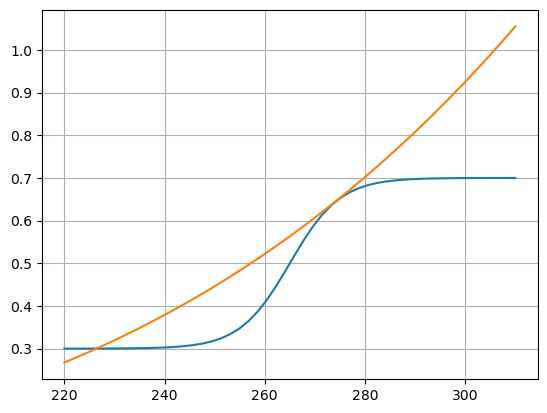

In [15]:
Q0 = 342
plotme(0.9*Q0)

## OPTIONAL: Bifurcations as Q changes

We want to vary Q and examine the transition of the (potentially) three states of the system. It is possible to do this algorithmically rather than graphically. The idea is that we begin from a value of $Q$, solve for the root, increment $Q$, then re-solve for another root, etc. by bootstrapping from one value to the next. 

--------
Warning at Q/Q0 =  1.2657894736842106
Warning at Q/Q0 =  1.286842105263158
Warning at Q/Q0 =  1.3078947368421052
Warning at Q/Q0 =  1.3289473684210527
Warning at Q/Q0 =  1.35
--------
Warning at Q/Q0 =  1.2657894736842106
Warning at Q/Q0 =  1.286842105263158
Warning at Q/Q0 =  1.3078947368421052
Warning at Q/Q0 =  1.3289473684210527
Warning at Q/Q0 =  1.35
--------


Text(0, 0.5, 'steady state temperature')

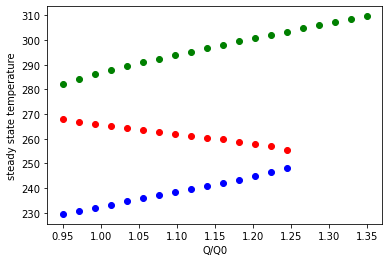

In [6]:
Q0 = 342
Qmat = Q0*np.linspace(0.95, 1.35, 20)

print("--------")
# initial guess
Tinit = 232
for i, Q in enumerate(Qmat):
    f = lambda T: Q*(1 - a(T)) - sig*gamma*T**4
    sol = root(f, Tinit)
    Tsol = sol.x
    Tinit = Tsol
    
    if sol.success == 1:
        plt.plot(Q/Q0, Tsol, 'bo')
    else:
        print("Warning at Q/Q0 = ", Q/Q0)

print("--------")
# initial guess
Tinit = 260
for i, Q in enumerate(Qmat):
    f = lambda T: Q*(1 - a(T)) - sig*gamma*T**4
    sol = root(f, Tinit)
    Tsol = sol.x
    Tinit = Tsol
    
    if sol.success == 1:
        plt.plot(Q/Q0, Tsol, 'ro')
    else:
        print("Warning at Q/Q0 = ", Q/Q0)
        

print("--------")
# initial guess
Tinit = 290
for i, Q in enumerate(Qmat):
    f = lambda T: Q*(1 - a(T)) - sig*gamma*T**4
    sol = root(f, Tinit)
    Tsol = sol.x
    Tinit = Tsol
    
    if sol.success == 1:
        plt.plot(Q/Q0, Tsol, 'go')
    else:
        print("Warning at Q/Q0 = ", Q/Q0)
    
plt.xlabel('Q/Q0')
plt.ylabel('steady state temperature')